In [23]:
# === BLOCK 1: IMPORTS & LOAD ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None) # Show all columns
plt.rcParams['figure.figsize'] = (12, 6)

# Load Data
try:
    df = pd.read_csv('hotel_bookings.csv')
    print(" Data Loaded Successfully.")
    print(f"   Shape: {df.shape[0]:,} Rows, {df.shape[1]} Columns")
except FileNotFoundError:
    print("File not found. Please upload 'hotel_bookings.csv' to Colab.")

 Data Loaded Successfully.
   Shape: 119,390 Rows, 33 Columns


In [24]:
# === BLOCK 2: INITIAL INSPECTION ===
print("--- 1. DATA HEAD (First 5 Rows) ---")
display(df.head())

print("\n--- 2. DATA INFO (Types & Nulls) ---")
print(df.info())

print("\n--- 3. MISSING VALUES ---")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n--- 4. DUPLICATES ---")
print(f"Duplicate Rows: {df.duplicated().sum()}")

--- 1. DATA HEAD (First 5 Rows) ---


,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15



--- 2. DATA INFO (Types & Nulls) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 n

In [25]:
# === BLOCK 3: CLEANING & FEATURE ENGINEERING ===

# 1. Handle Missing Data
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# 2. Drop Duplicates
df.drop_duplicates(inplace=True)

# 3. Create Total Guests (Adults + Children + Babies)
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# 4. Filter Invalid Rows (0 Guests or Negative Rates)
# It's impossible to have 0 guests or a negative price
clean_df = df[(df['total_guests'] > 0) & (df['adr'] >= 0)].copy()

# 5. Date Parsing
# Create a proper datetime column from Year, Month, Day columns
clean_df['arrival_date_str'] = (clean_df['arrival_date_year'].astype(str) + '-' +
                                clean_df['arrival_date_month'] + '-' +
                                clean_df['arrival_date_day_of_month'].astype(str))
clean_df['arrival_date'] = pd.to_datetime(clean_df['arrival_date_str'], format='%Y-%B-%d', errors='coerce')

# 6. Total Stay Length
clean_df['total_nights'] = clean_df['stays_in_week_nights'] + clean_df['stays_in_weekend_nights']

print(f" Data Cleaned. Rows remaining: {len(clean_df):,}")

 Data Cleaned. Rows remaining: 119,209


/tmp/ipython-input-3611060063.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3611060063.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3611060063.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3611060063.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3611060063.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated a

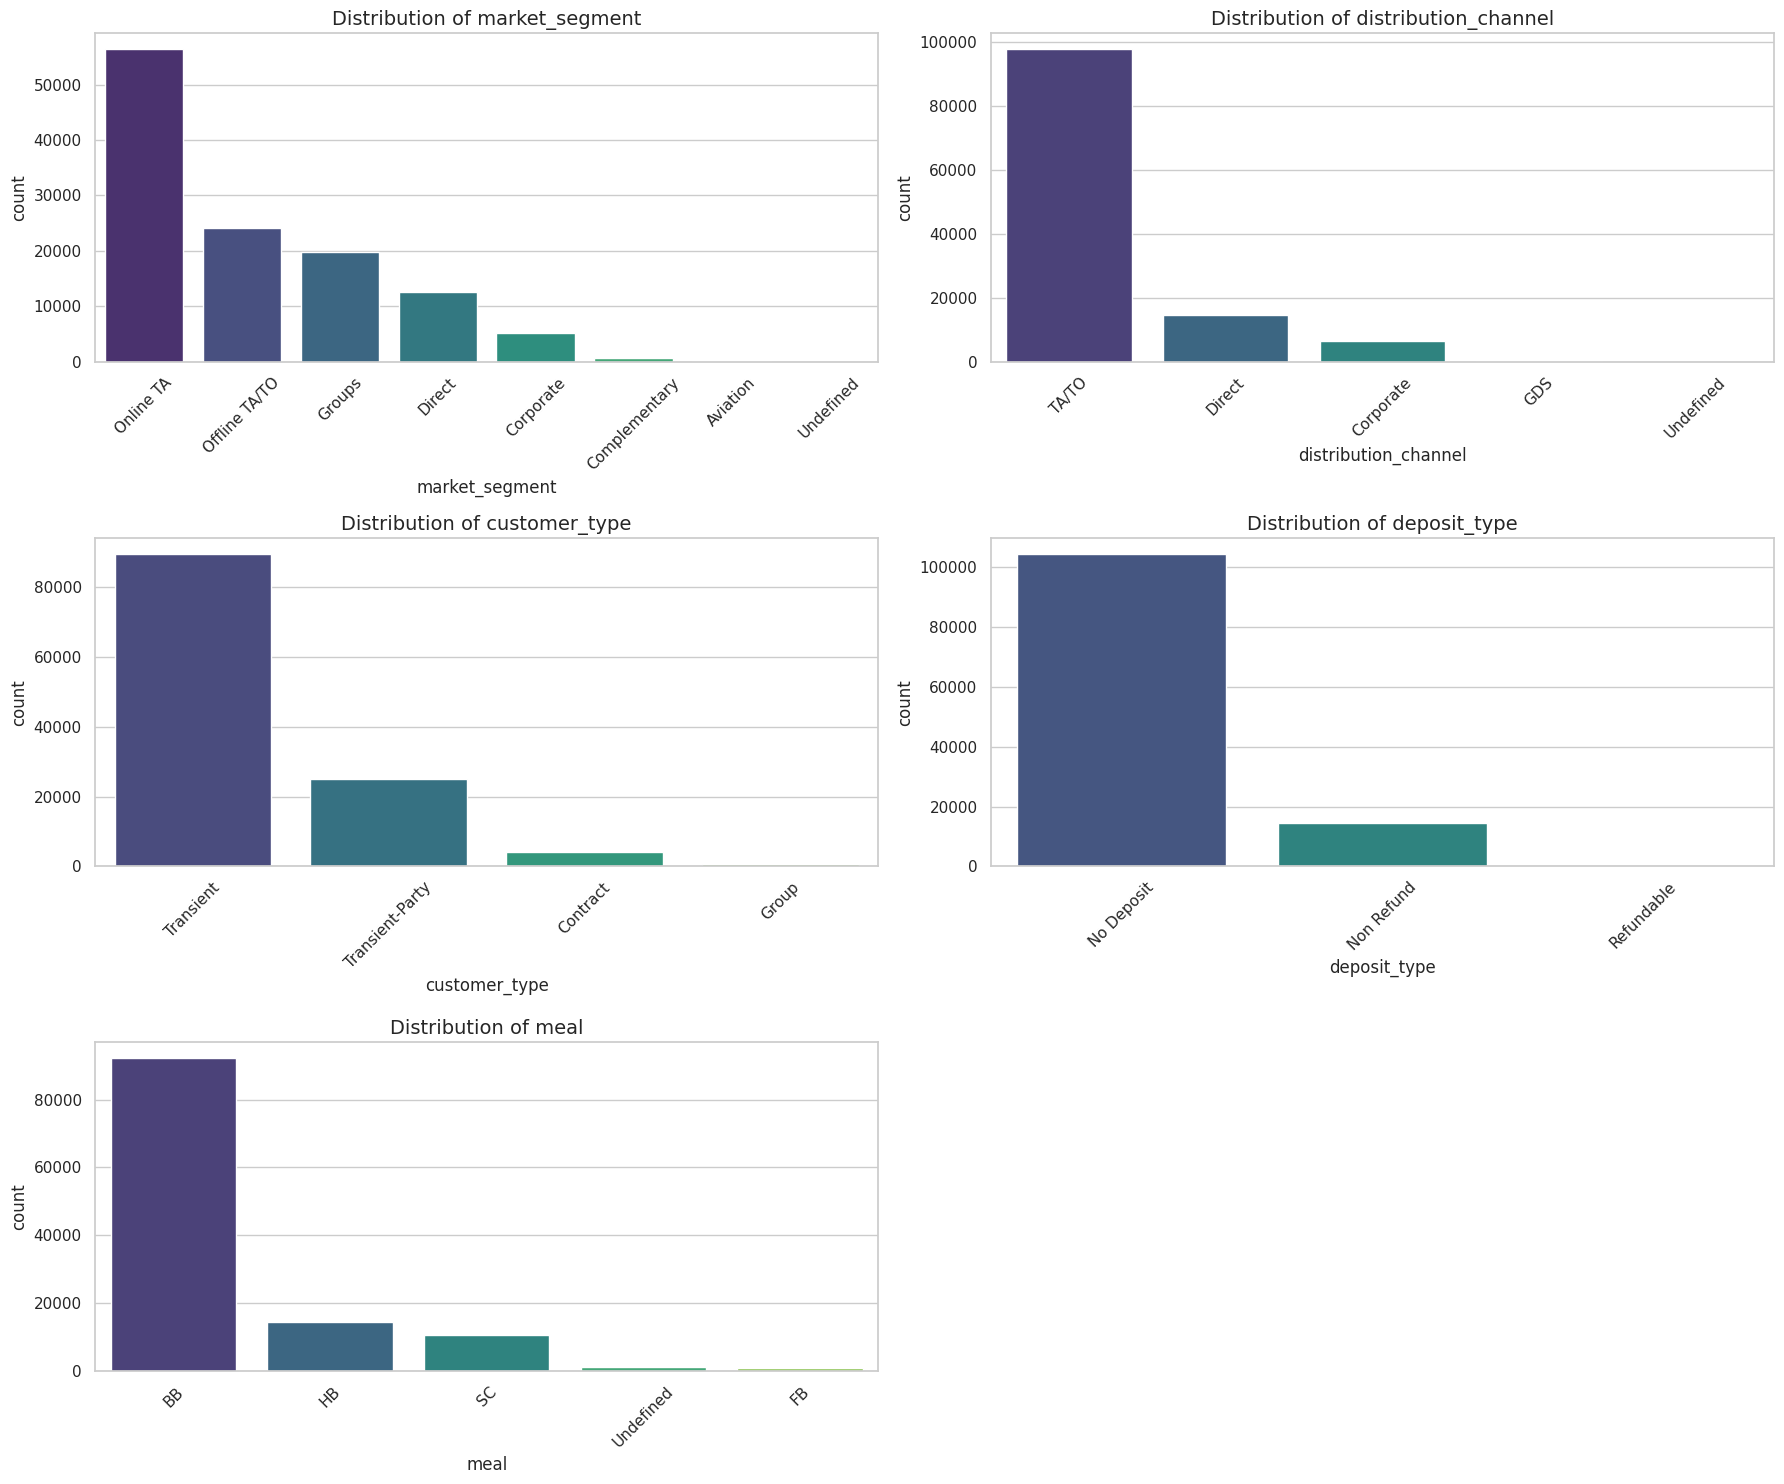

 INSIGHT: 'Online TA' is the dominant segment. 'Deposit Type' is almost entirely 'No Deposit'.


In [26]:
# === BLOCK 4: CATEGORICAL ANALYSIS ===

# Define categorical columns to inspect
cat_cols = ['market_segment', 'distribution_channel', 'customer_type', 'deposit_type', 'meal']

fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=clean_df, x=col, order=clean_df[col].value_counts().index, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot if any
if len(cat_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

print(" INSIGHT: 'Online TA' is the dominant segment. 'Deposit Type' is almost entirely 'No Deposit'.")

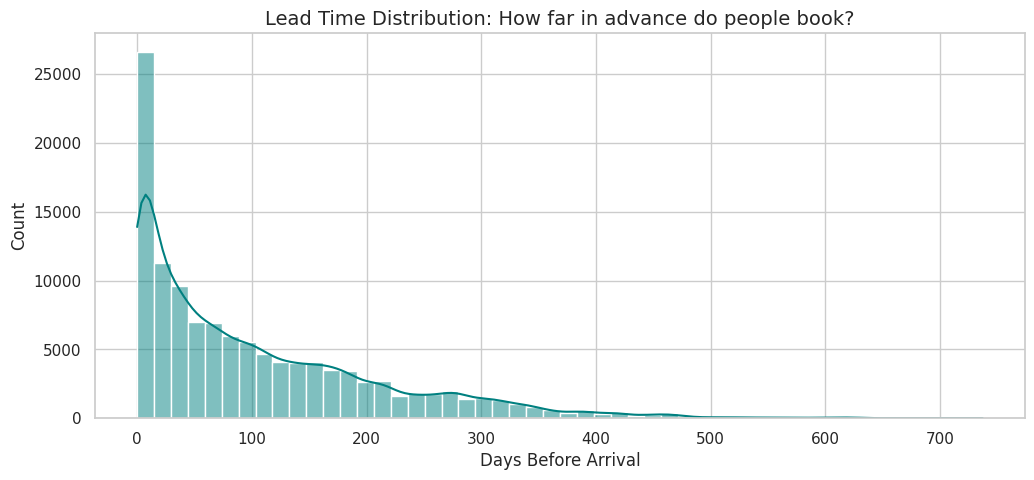

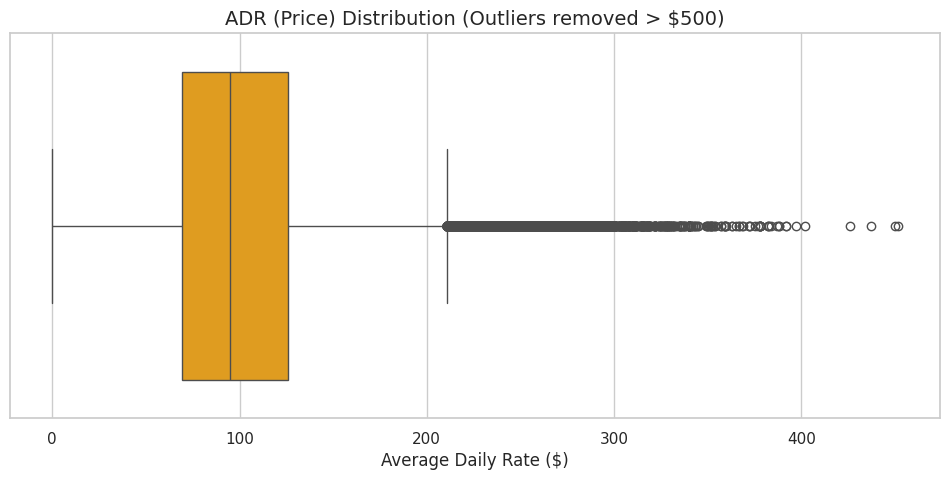

In [27]:
# === BLOCK 5: NUMERICAL DISTRIBUTIONS ===

# 1. Lead Time Distribution (Histogram)
plt.figure(figsize=(12, 5))
sns.histplot(clean_df['lead_time'], bins=50, kde=True, color='teal')
plt.title("Lead Time Distribution: How far in advance do people book?", fontsize=14)
plt.xlabel("Days Before Arrival")
plt.show()

# 2. ADR (Price) Distribution (Boxplot to see outliers)
# Filter extreme outliers (> $500) for better visualization
plt.figure(figsize=(12, 5))
sns.boxplot(x=clean_df[clean_df['adr'] < 500]['adr'], color='orange')
plt.title("ADR (Price) Distribution (Outliers removed > $500)", fontsize=14)
plt.xlabel("Average Daily Rate ($)")
plt.show()



/tmp/ipython-input-257331651.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




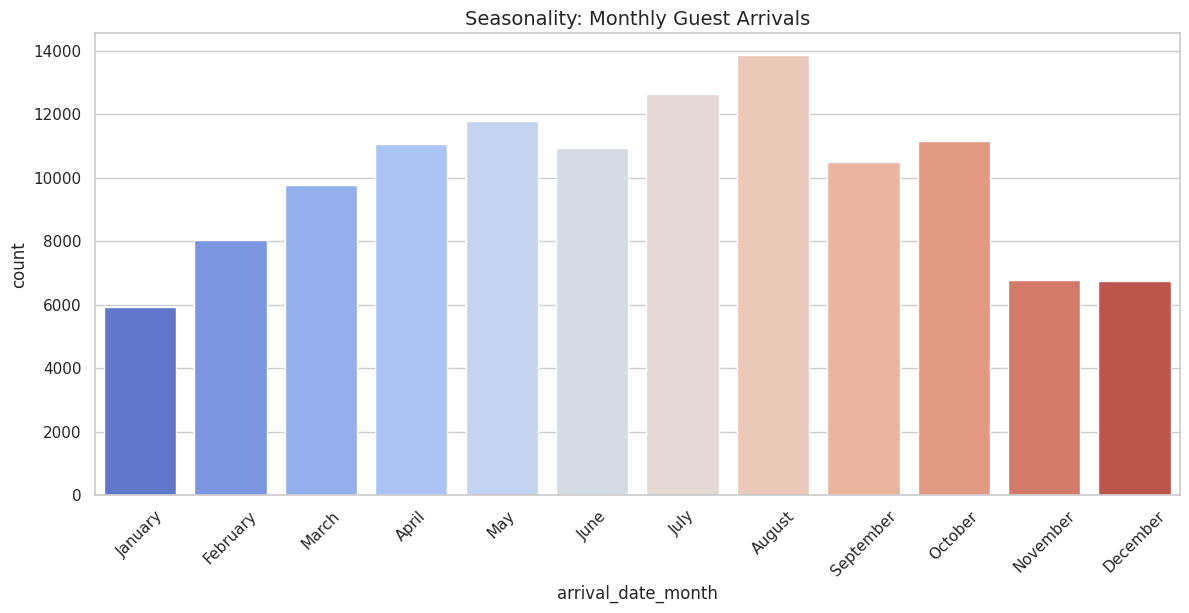

/tmp/ipython-input-257331651.py:15: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



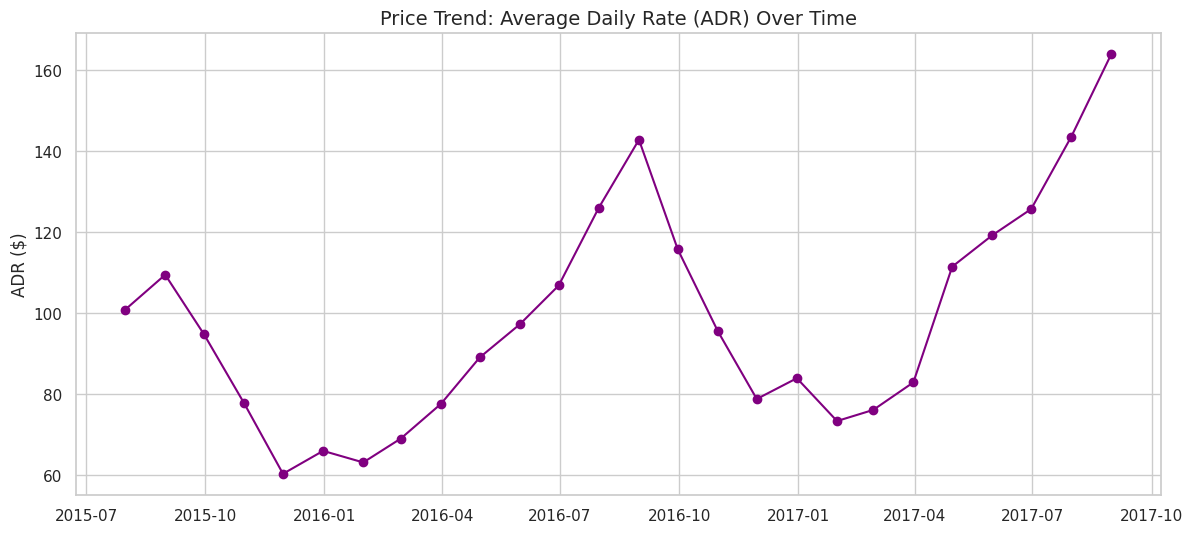

In [28]:
# === BLOCK 6: TIME SERIES & SEASONALITY ===

# 1. Monthly Arrivals
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(14, 6))
sns.countplot(data=clean_df, x='arrival_date_month', order=month_order, palette='coolwarm')
plt.title("Seasonality: Monthly Guest Arrivals", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 2. ADR Trends Over Time (Line Chart)
# Group by Month-Year to see the price trend
monthly_adr = clean_df.groupby('arrival_date')[['adr']].mean().resample('M').mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly_adr.index, monthly_adr['adr'], marker='o', linestyle='-', color='purple')
plt.title("Price Trend: Average Daily Rate (ADR) Over Time", fontsize=14)
plt.ylabel("ADR ($)")
plt.show()

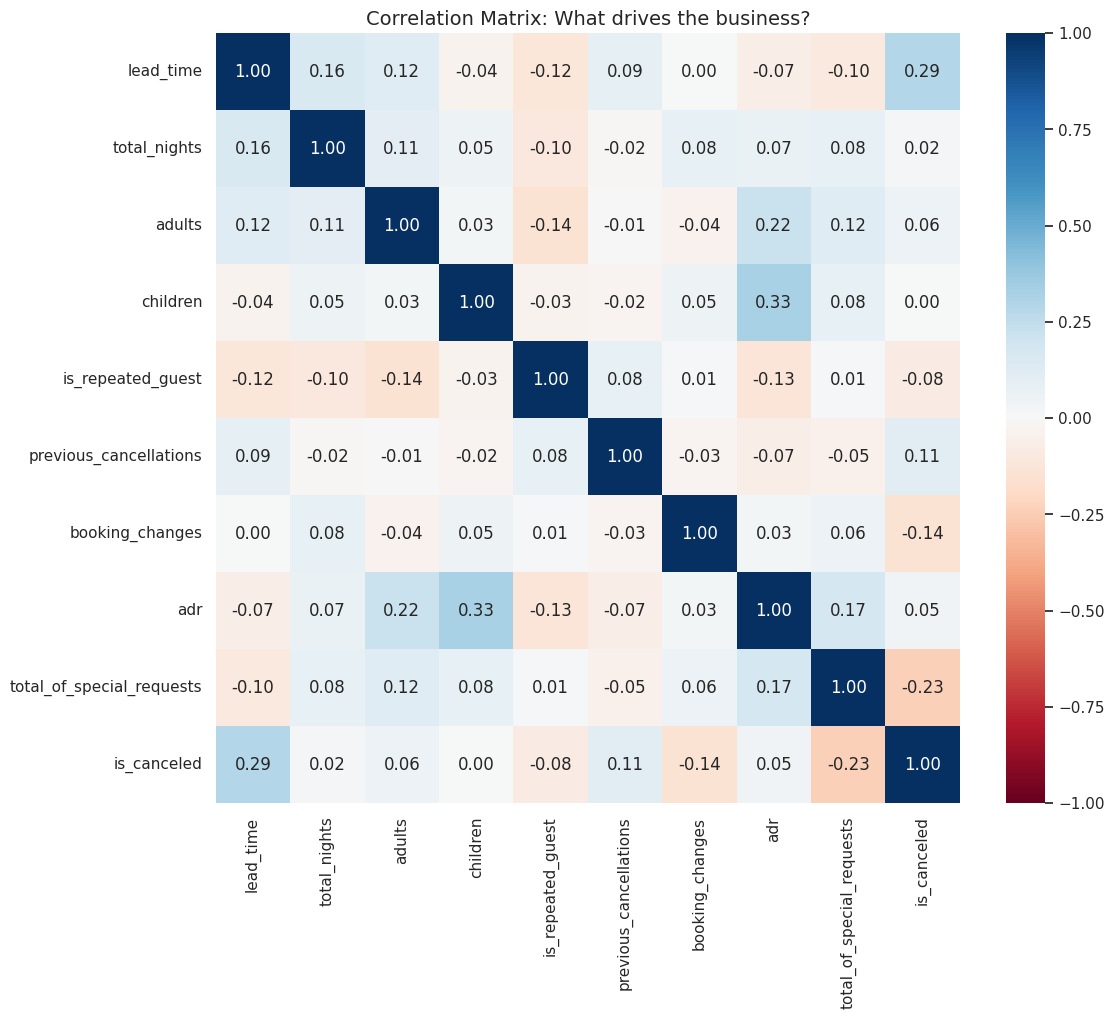

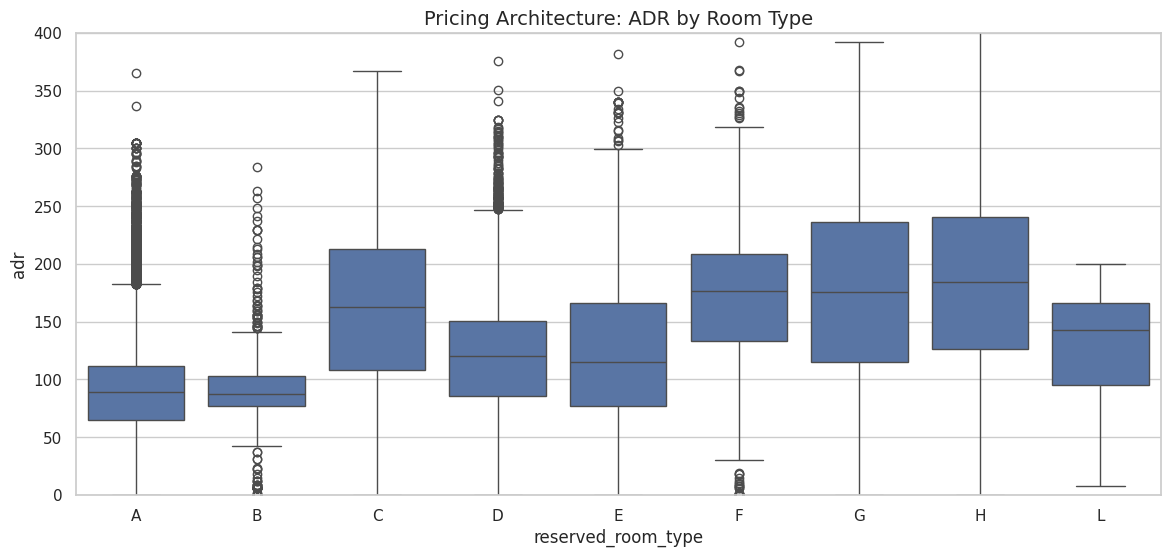

In [29]:
# === BLOCK 7: BIVARIATE ANALYSIS ===

# 1. Correlation Heatmap (Numerical Variables)
corr_cols = ['lead_time', 'total_nights', 'adults', 'children', 'is_repeated_guest',
             'previous_cancellations', 'booking_changes', 'adr', 'total_of_special_requests', 'is_canceled']

plt.figure(figsize=(12, 10))
sns.heatmap(clean_df[corr_cols].corr(), annot=True, cmap='RdBu', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix: What drives the business?", fontsize=14)
plt.show()

# 2. Price vs. Room Type (Boxplot)
plt.figure(figsize=(14, 6))
sns.boxplot(data=clean_df, x='reserved_room_type', y='adr', order=sorted(clean_df['reserved_room_type'].unique()))
plt.title("Pricing Architecture: ADR by Room Type", fontsize=14)
plt.ylim(0, 400) # Limiting y-axis for readability
plt.show()

In [30]:
# === BLOCK 8: GEOGRAPHIC ANALYSIS ===

# Aggregate by Country
country_data = clean_df.groupby('country').agg(
    guests=('is_canceled', 'count'),
    avg_rate=('adr', 'mean')
).reset_index()

# Interactive Map using Plotly
fig = px.choropleth(country_data,
                    locations="country",
                    color="guests",
                    hover_name="country",
                    hover_data=["avg_rate"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global Source Markets: Where are guests coming from?")
fig.show()

# Top 10 Countries Table
print("--- Top 10 Source Markets ---")
display(country_data.sort_values('guests', ascending=False).head(10))

--- Top 10 Source Markets ---


,country,guests,avg_rate
135,PRT,48483,92.233718
59,GBR,12119,96.090748
56,FRA,10401,109.755914
51,ESP,8560,117.094384
43,DEU,7285,104.425417
81,ITA,3761,114.099694
76,IRL,3374,98.221274
15,BEL,2342,113.847784
25,BRA,2222,111.061418
123,NLD,2103,108.135269


--- RATE PARITY AUDIT ---
                      mean  median  count
market_segment                           
Online TA       117.318022   109.8  56408
Direct          115.634595   105.0  12582
Offline TA/TO    87.479307    85.5  24182
Corporate        69.528332    65.0   5282

 NEGOTIATION INSIGHT: Corporate Savings Spread is 40.7% vs Public Rates.


/tmp/ipython-input-1022880549.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




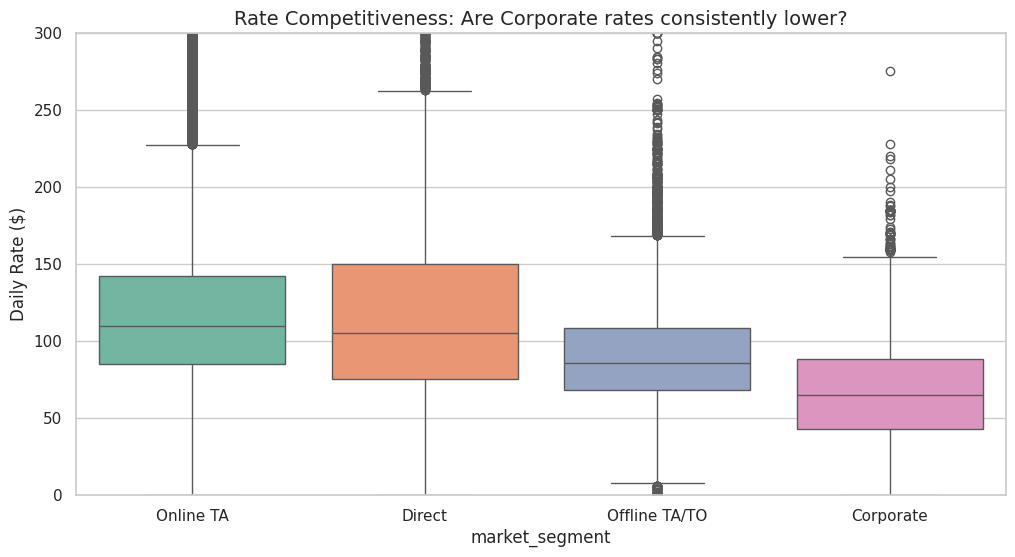

In [31]:
# === BLOCK 9: NEGOTIATION STRATEGY ANALYTICS ===

# 1. Compare Corporate (Negotiated) vs. Online TA (Public) Rates
# We want to see if the "Corporate" discount is real.
segments_of_interest = ['Corporate', 'Online TA', 'Direct', 'Offline TA/TO']
rate_analysis = clean_df[clean_df['market_segment'].isin(segments_of_interest)]

# Calculate Average Daily Rate (ADR) per segment
avg_rates = rate_analysis.groupby('market_segment')['adr'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)

# Calculate the "Spread" (Savings %)
public_rate = avg_rates.loc['Online TA', 'mean']
corp_rate = avg_rates.loc['Corporate', 'mean']
savings_pct = ((public_rate - corp_rate) / public_rate) * 100

print("--- RATE PARITY AUDIT ---")
print(avg_rates)
print(f"\n NEGOTIATION INSIGHT: Corporate Savings Spread is {savings_pct:.1f}% vs Public Rates.")

# 2. Visualization: Rate Spread Boxplot
# Shows if Corporate rates are consistently low or if there are spikes (bad negotiation)
plt.figure(figsize=(12, 6))
sns.boxplot(data=rate_analysis, x='market_segment', y='adr', palette='Set2', order=['Online TA', 'Direct', 'Offline TA/TO', 'Corporate'])
plt.title("Rate Competitiveness: Are Corporate rates consistently lower?", fontsize=14)
plt.ylim(0, 300)
plt.ylabel("Daily Rate ($)")
plt.show()

 Training Risk Model... 


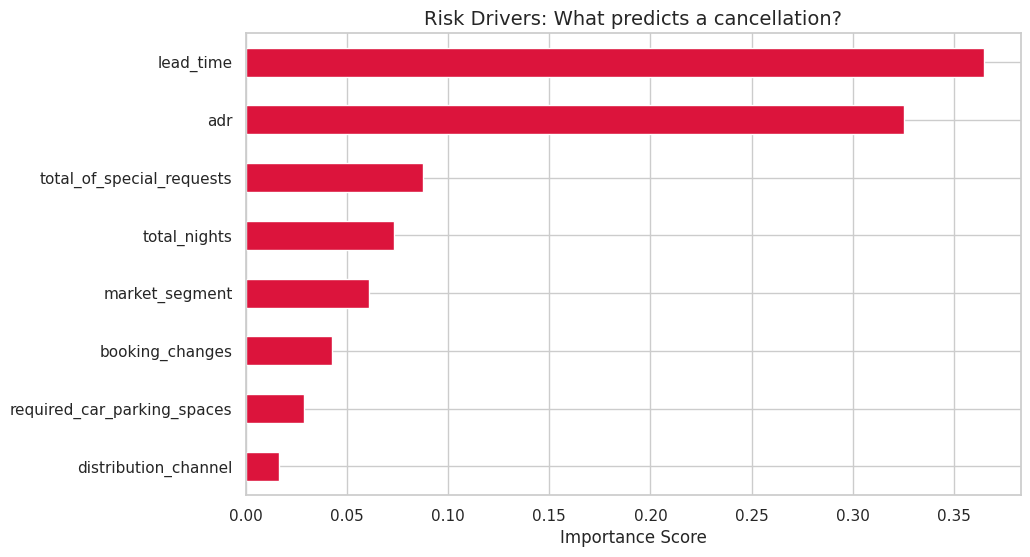

In [32]:
# === BLOCK 10: PREDICTIVE MODELING (CANCELLATION RISK) ===
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 1. Data Preparation for ML
# Select relevant features
features = ['lead_time', 'total_nights', 'adr', 'total_of_special_requests',
            'required_car_parking_spaces', 'booking_changes', 'market_segment', 'distribution_channel']
ml_df = clean_df[features + ['is_canceled']].copy()

# Encode Categorical Variables (Turn text into numbers)
le = LabelEncoder()
for col in ['market_segment', 'distribution_channel']:
    ml_df[col] = le.fit_transform(ml_df[col])

# 2. Split Train/Test
X = ml_df.drop('is_canceled', axis=1)
y = ml_df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Random Forest Model
print(" Training Risk Model... ")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Feature Importance (Why do they cancel?)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
importances.plot(kind='barh', color='crimson')
plt.title("Risk Drivers: What predicts a cancellation?", fontsize=14)
plt.xlabel("Importance Score")
plt.gca().invert_yaxis() # Top feature at the top
plt.show()

